In [7]:
import pandas as pd;

In [8]:
df=pd.read_csv("pune_rent_data[1].CSV")

In [9]:
df.head()

,ListingID,Locality,BHK,Area_sqft,Furnishing,Floor,Age_Years,Availability,Tenant_Type,Parking,Lift,Balconies,Bathrooms,Rent_INR
0,PN100000,Hadapsar,1,402,Semi-Furnished,8,19,Immediate,Bachelor,0,1,3,1,19200
1,PN100001,Baner,1,449,Furnished,20,20,Immediate,Family,1,1,2,1,34800
2,PN100002,Hadapsar,3,1176,Furnished,6,0,After 2 months,Family,1,1,0,4,33200
3,PN100003,Dhayari,2,669,Furnished,4,27,After 1 month,Bachelor,1,1,1,2,9700
4,PN100004,Narhe,2,945,Unfurnished,13,18,Immediate,Family,1,1,2,4,12600


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ListingID     1000 non-null   object
 1   Locality      1000 non-null   object
 2   BHK           1000 non-null   int64 
 3   Area_sqft     1000 non-null   int64 
 4   Furnishing    1000 non-null   object
 5   Floor         1000 non-null   int64 
 6   Age_Years     1000 non-null   int64 
 7   Availability  1000 non-null   object
 8   Tenant_Type   1000 non-null   object
 9   Parking       1000 non-null   int64 
 10  Lift          1000 non-null   int64 
 11  Balconies     1000 non-null   int64 
 12  Bathrooms     1000 non-null   int64 
 13  Rent_INR      1000 non-null   object
dtypes: int64(8), object(6)
memory usage: 109.5+ KB


In [11]:
df.isnull().sum()

ListingID       0
Locality        0
BHK             0
Area_sqft       0
Furnishing      0
Floor           0
Age_Years       0
Availability    0
Tenant_Type     0
Parking         0
Lift            0
Balconies       0
Bathrooms       0
Rent_INR        0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df['Furnishing'].value_counts() 

Furnishing
Unfurnished       419
Semi-Furnished    353
Furnished         228
Name: count, dtype: int64

In [14]:
df.duplicated().sum()

0

In [15]:
import seaborn as sns
# import matplotlib.pyplot as plt
House_Rent = df.groupby('Locality')['Rent_INR'].mean()
sns.barplot(x=Rent_INR.index, y=Rent_INR.values)
plt.title("Rent_INR vs Locality")
plt.xticks(rotation=45)
plt.show()

TypeError: agg function failed [how->mean,dtype->object]

In [82]:
df['Rent_INR'] = pd.to_numeric(df['Rent_INR'], errors='coerce')
y.isna().sum()
df = df.dropna(subset=['Rent_INR'])

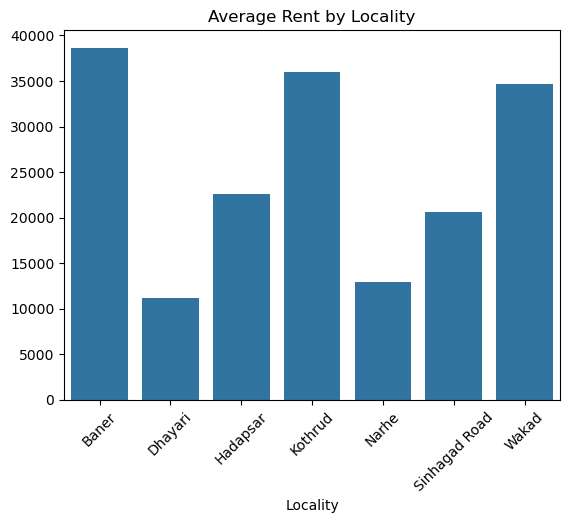

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

House_Rent = df.groupby('Locality')['Rent_INR'].mean()

sns.barplot(x=House_Rent.index, y=House_Rent.values)
plt.title("Average Rent by Locality")
plt.xticks(rotation=45)
plt.show()

***Barplot — Bachelor Tenants vs Locality***

In [130]:
df['Tenant_Type'].unique()

array(['Bachelor', 'Family', 'Company'], dtype=object)

In [132]:
Bachelor_df = df[df['Tenant_Type'] == 'Bachelor']                        # Filter Only Bachelor Tenants

In [134]:
Bachelor_count = Bachelor_df['Locality'].value_counts()
print(Bachelor_count)                                      #use to find Top localities for employee renters

Locality
Hadapsar         60
Wakad            45
Baner            45
Kothrud          45
Sinhagad Road    39
Dhayari          34
Narhe            31
Name: count, dtype: int64


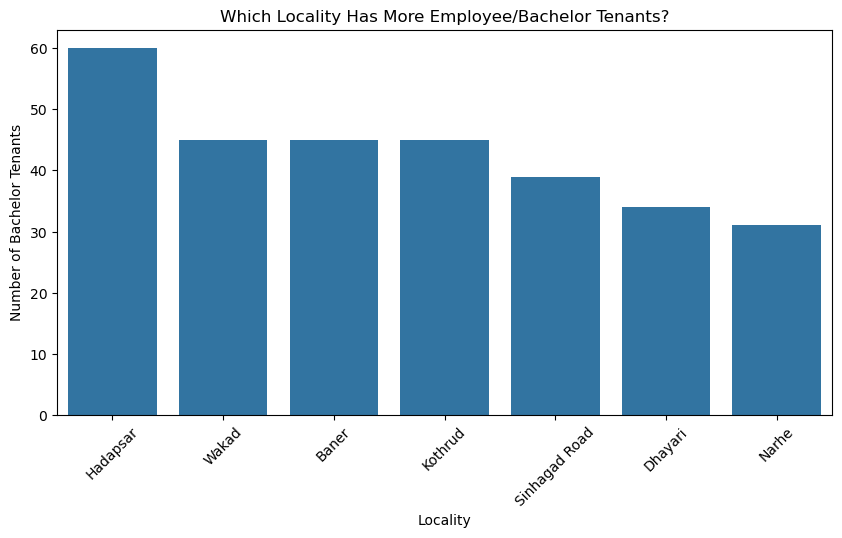

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.barplot(x=Bachelor_count.index, y=Bachelor_count.values)

plt.title("Which Locality Has More Employee/Bachelor Tenants?")
plt.xlabel("Locality")
plt.ylabel("Number of Bachelor Tenants")
plt.xticks(rotation=45)
plt.show()


In [86]:
X = df.drop(columns=['Rent_INR'])
y = df['Rent_INR']

In [42]:
cat_cols = ['Locality','Furnishing','Availability','Tenant_Type']
num_cols = ['BHK','Area_sqft','Floor','Age_Years','Parking','Lift','Balconies','Bathrooms']

In [88]:
from sklearn.compose import ColumnTransformer                               # handle numerical + categorical data differently
from sklearn.preprocessing import OneHotEncoder                                          #covert categorical data to numeric
preprocess = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
        ('num', 'passthrough', num_cols)
    ]
)

In [90]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor                                         # use randomforestregressor for predict highest accurancy
model = Pipeline(steps=[
    ('preprocess', preprocess),
    ('rf', RandomForestRegressor(n_estimators=200, random_state=42))                               # usually randonforest work best in prediction
])

In [92]:
from sklearn.model_selection import train_test_split                      #use for evalution Divide data into train,test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [94]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Locality', 'Furnishing',
                                                   'Availability',
                                                   'Tenant_Type']),
                                                 ('num', 'passthrough',
                                                  ['BHK', 'Area_sqft', 'Floor',
                                                   'Age_Years', 'Parking',
                                                   'Lift', 'Balconies',
                                                   'Bathrooms'])])),
                ('rf',
                 RandomForestRegressor(n_estimators=200, random_state=42))])

In [102]:
from sklearn.metrics import r2_score, mean_absolute_error
y_pred = model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

R2 Score: 0.9379014763804897
MAE: 2016.6175


***Save the Model***

In [98]:
import joblib
joblib.dump(model, "rent_prediction_model.pkl")

['rent_prediction_model.pkl']

***I built a House Rent Prediction model using Random Forest.
First, I cleaned the data, encoded categorical columns with OneHotEncoding, and used a 
ColumnTransformer + Pipeline to streamline preprocessing and model training.
I split the data into train-test, trained the model using RandomForestRegressor, evaluated it using R2 Score and MAE,
and finally saved the model using joblib for deployment.***